In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [159]:
def kmeans(data, initial_centroids):
    df = pd.DataFrame(data, columns=["x", "y"])
    centroids = pd.DataFrame(initial_centroids, columns=["x", "y"])

    while True:
        df["cluster"] = df.apply(
            lambda x: np.argmin(
                (x["x"] - centroids["x"]) ** 2 + (x["y"] - centroids["y"]) ** 2
            ),
            axis=1,
        )
        new_centroid = df.groupby("cluster").mean()
        if np.allclose(centroids.to_numpy(), new_centroid.to_numpy()):
            break
        centroids = new_centroid
        plt.figure(dpi=360)
        sns.scatterplot(
            pd.concat(
                [df, centroids.reset_index(names="cluster")], keys=[0, 1]
            ).reset_index(level=0, names="centroid"),
            x="x",
            y="y",
            hue="cluster",
            style="centroid",
            palette=sns.color_palette("hls", n_colors=3),
            legend=False,
        )

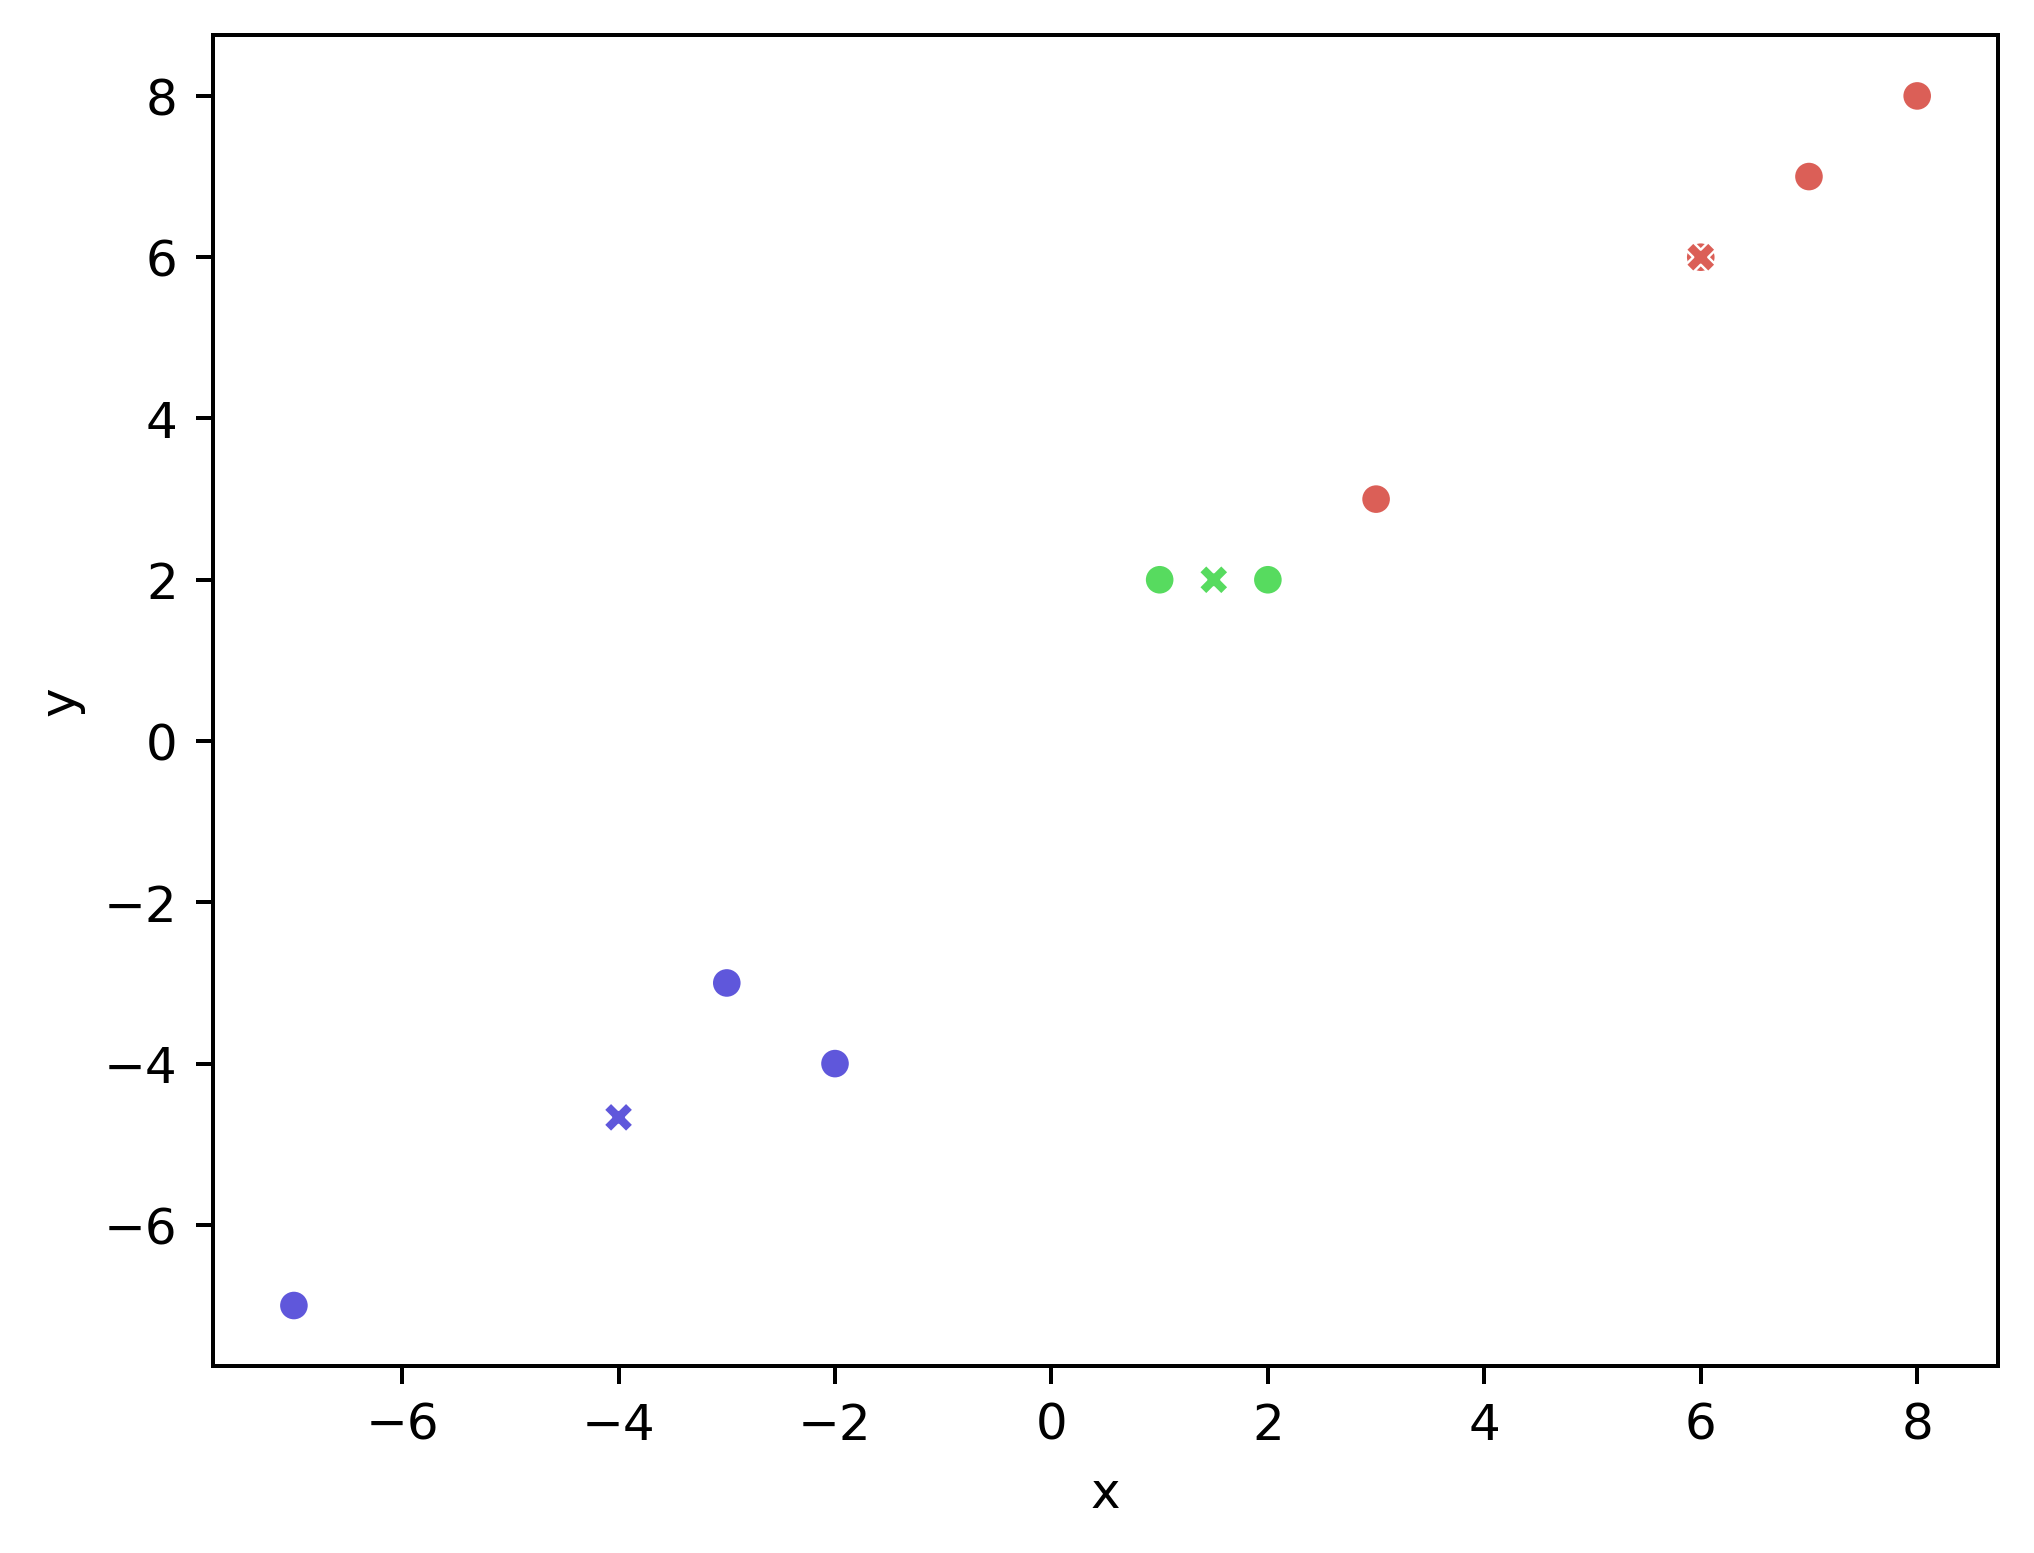

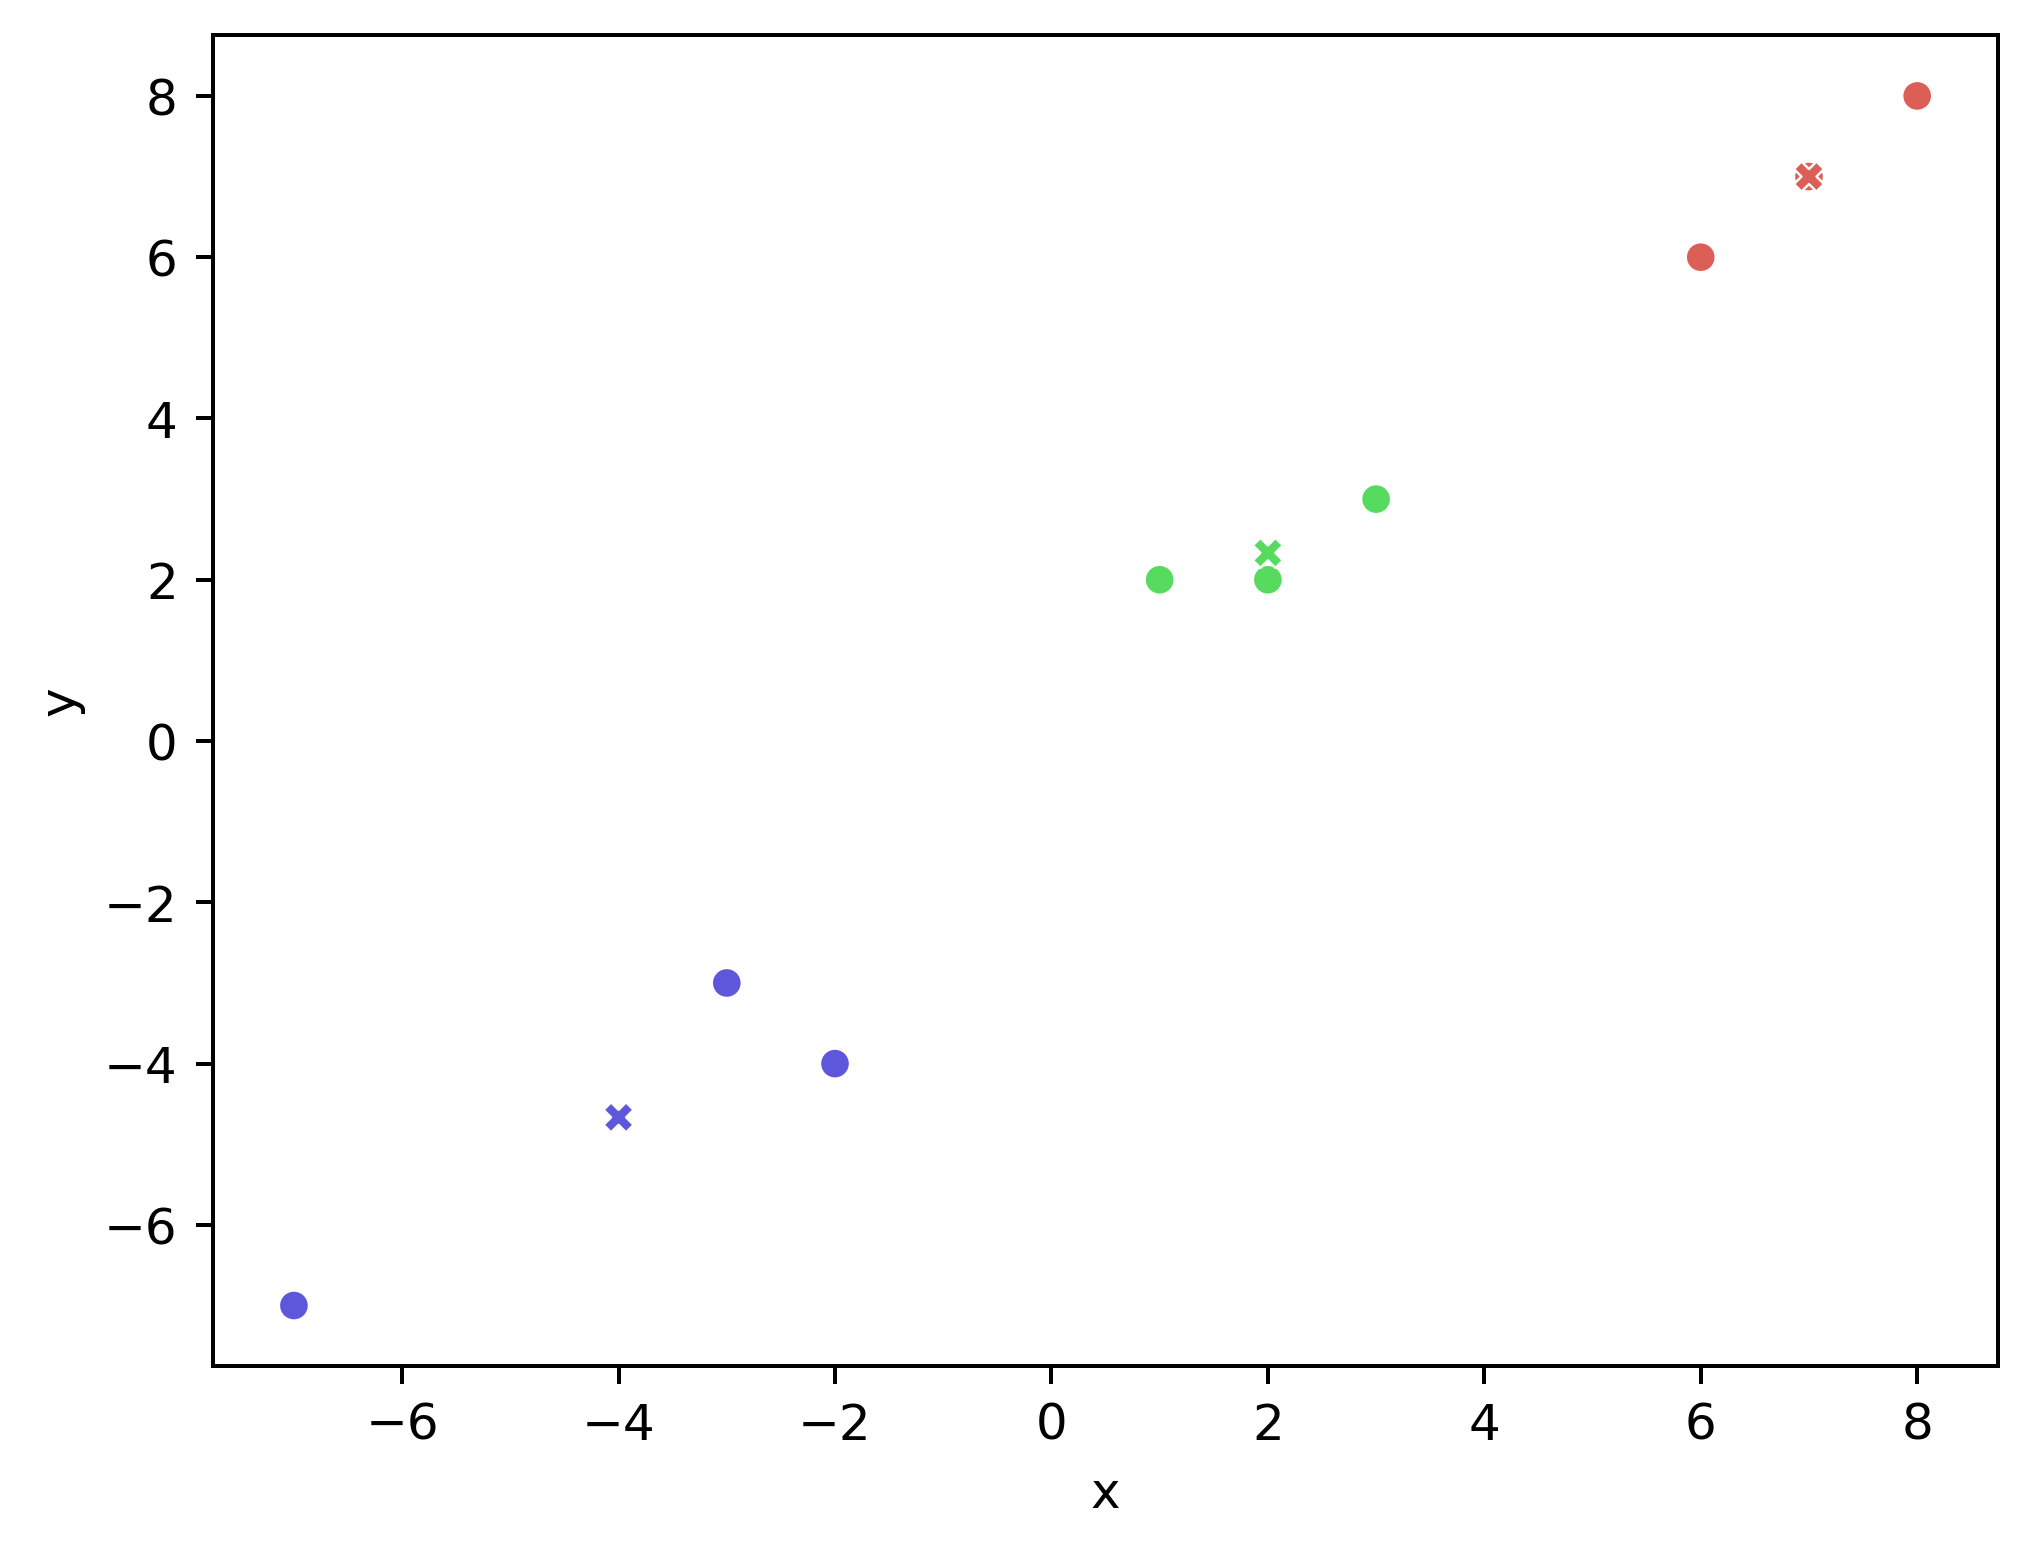

In [160]:
data = np.array(
    [[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]]
)
kmeans(data, np.array([[3, 3], [2, 2], [-3, -3]]))

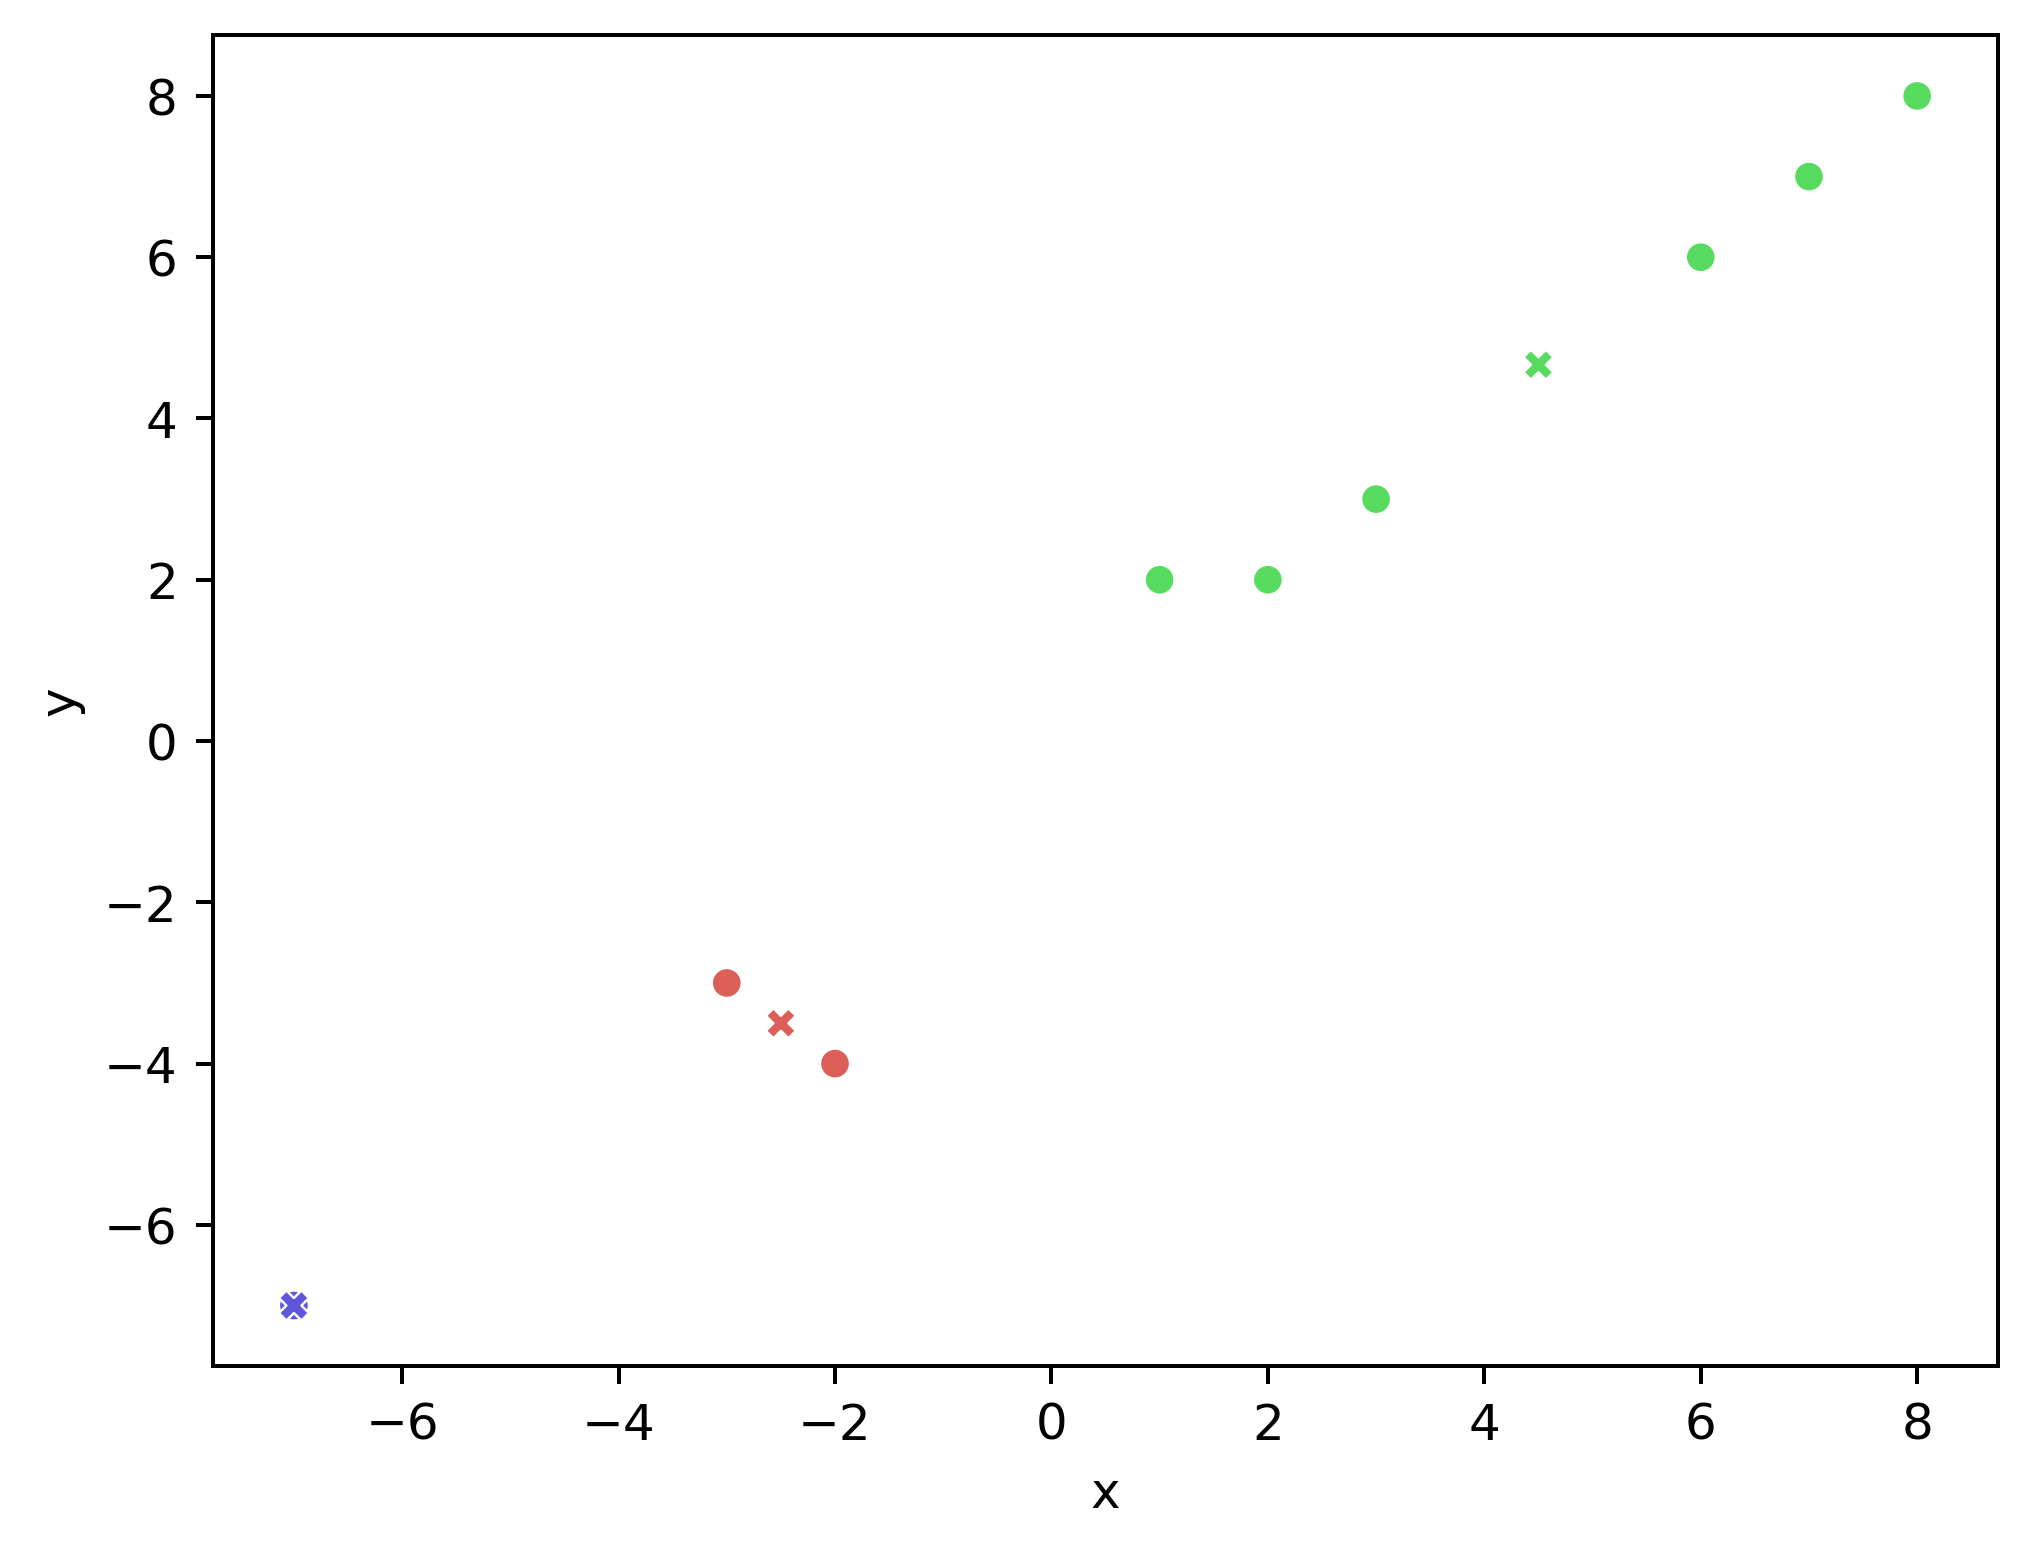

In [161]:
kmeans(data, np.array([[-3, -3], [2, 2], [-7, -7]]))